# **Deep Neural Network (DNN) 구현하기**

##0. 텐서플로 버전 선택
- Colab에 기본 설치된 텐서플로 버전은 현재 2.5.0 이다.
- 1.x 버전을 사용해야 하는 경우 선택한다. 
  - 그런데 동작하지 않을 때도 있고 동작할 때도 있다....
  - 런타임 유형이 GPU를 사용하는 유형인 경우 동작하지 않을 때가 많다.

In [1]:
# %tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

2.5.0


####<br>
#######################################################################################################

## 1. 모듈 임포팅
- 기본적으로 사용할 모듈을 임포팅한다.
- 전체 프로세스에 연관되지 않고 별도로 사용할 모듈은 해당 블럭에서 직접 임포팅하도록 한다.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

import time

####<br>
#######################################################################################################

## 2. Colab 시스템의 정보 확인

### 2-1. 디바이스 리스트 보기
- 사용하는 GPU의 목록을 확인한다.
- Colab의 경우, 일반적으로 1개의 GPU / TPU를 지원할 수 있다.

In [ ]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

### 2-2. NVIDIA GPU 상태 확인

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



####<br>
#######################################################################################################

## 3. DNN Template

### 3-1. 데이터 준비
- $y=x^2$ : 1차원 데이터 $x$와 $x^2$의 1차원 데이터 $y$ 

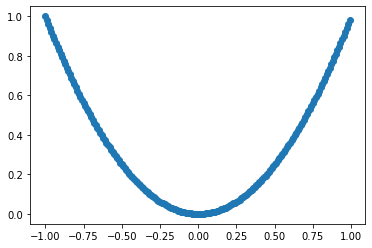

In [ ]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape)

200
(200,)


####<br>

### 3-2. 기본 코드 작성
- DNN을 구현하기 위한 최소한의 기본 코드 작성
- 기본 코드에 최소한의 요구사항 정도만 추가
- 이 정도는 매번 사용하는 코드가 됨

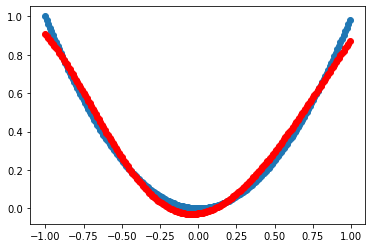

In [ ]:
# 모델 정의
model = Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

####<br>

### 3-3. 성능 평가하기
- model.evaluate()를 사용하여 기본 DNN 모델의 성능을 평가해보자
- 출력에 loss와 mse를 추가해보자

200/200 [==============================] - 0s 189us/sample - loss: 0.0011 - mean_squared_error: 0.0011
loss= 0.0010801592748612165
mse= 0.0010801592


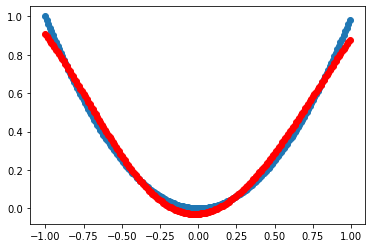

In [ ]:
model = Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) ))    # 3-2에서 사용한 Input 방식 외에 이런 방식도 사용할 수 있음
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])   # 정보를 보기위한 Key를 metrics에 추가


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

####<br>

### 3-5. 테스트셋으로 평가하기
- 데이터를 train과 test으로 나누어 준비함

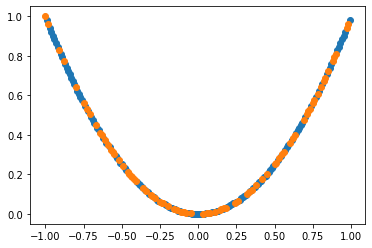

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

80/80 [==============================] - 0s 457us/sample - loss: 0.0012 - mean_squared_error: 0.0012
loss= 0.0011598116951063275
mse= 0.0011598117


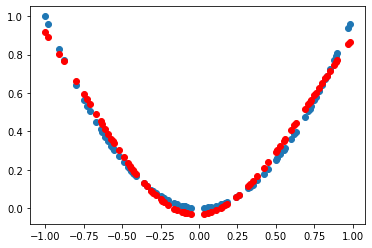

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

- train_x, train_y로 학습시키고, evaluate()와 predict()에는 test_x, test_y를 사용함
- 그려진 그림을 보면 test_x의 점사이에 빈 간격이 보이는데 그 간격이 train_x에 해당함
####<br>

### 3-6. Base Model 결과 저장
- 이후 비교를 위해 그래프를 저장해 둔다.

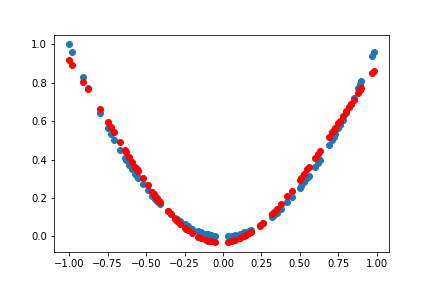

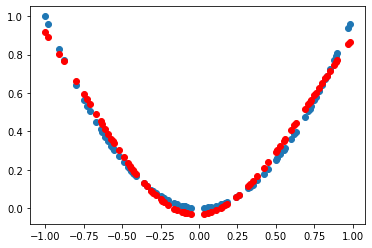

In [ ]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")


from IPython.display import Image
display(Image("base_result.png"))

####<br>

### 3-7. 학습 시간 출력

elapsed : 7.342241287231445
80/80 [==============================] - 0s 566us/sample - loss: 0.0013 - mean_squared_error: 0.0013
loss= 0.0013359706150367855
mse= 0.0013359706


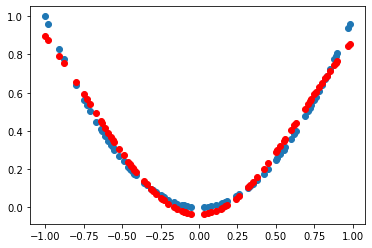

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- elapsed로 경과된 시간이 초 단위로 보인다.
####<br>

### 3-8. 구현된 DNN 모양 보기

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.661869764328003


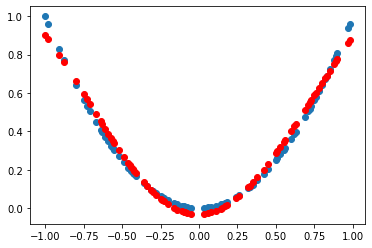

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- DNN을 구성하는 네트워크의 모양이 보인다.
- 노드 10개, 10개를 갖는 은닉층 2개가 있다.
- 모든 레이어는 activation(w\*x+b)의 형태를 가진다.
  - 첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트 가진다.
  - 두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트를 가진다.
####<br>

### 3-9.DNN Template 완성
- 실습에 사용되는 모든 코드의 템플릿

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.626516342163086
80/80 [==============================] - 0s 714us/sample - loss: 0.0025 - mean_squared_error: 0.0025
loss= 0.002528092823922634
mse= 0.0025280926


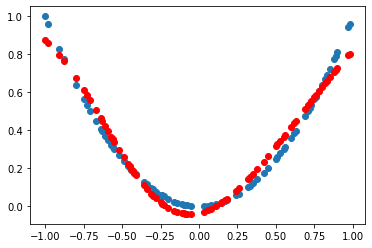

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 4. DNN 모델의 내부 형태 조정

### 4-1. 히든 레이어 개수 조정

#### 4-1-1. 히든레이어를 1개만

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.595692157745361
80/80 [==============================] - 0s 805us/sample - loss: 0.0020 - mean_squared_error: 0.0020
loss= 0.002015727758407593
mse= 0.0020157278


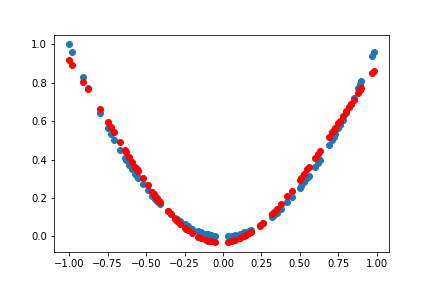

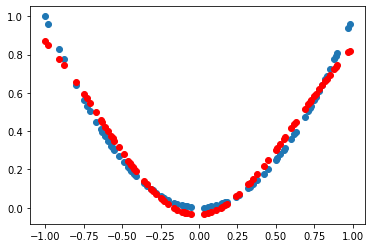

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 히든레이어가 2개에서 1개로 줄어들어도 큰 차이는 없다.
####<br>

#### 4-1-2. 히든레이어가 없을 때

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.107572555541992
80/80 [==============================] - 0s 827us/sample - loss: 0.0846 - mean_squared_error: 0.0846
loss= 0.08463420420885086
mse= 0.0846342


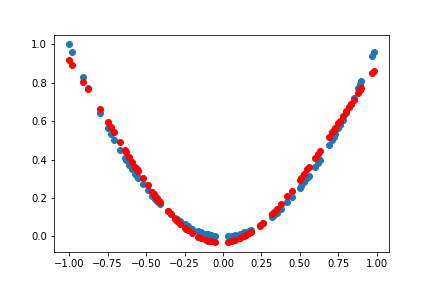

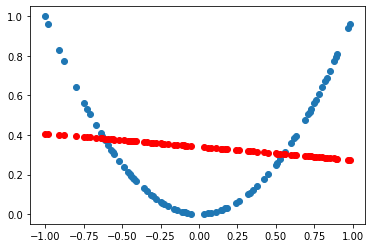

In [ ]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input((1,)))
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 히든 레이어가 없을 경우 학습되지 않는다.
####<br>

#### 4-1-3. 히든 레이어를 3개로

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.229540348052979
80/80 [==============================] - 0s 859us/sample - loss: 0.0015 - mean_squared_error: 0.0015
loss= 0.0015414290130138398
mse= 0.001541429


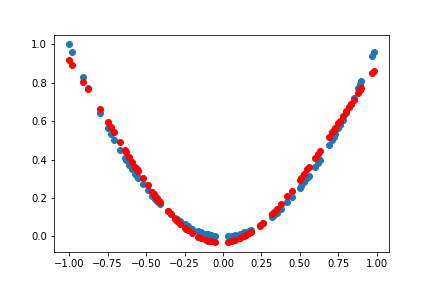

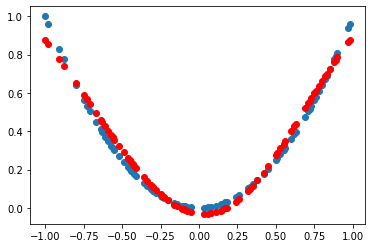

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 3개로 증가해도 별 차이 없다.
####<br>

#### 4-1-4. 히든 레이어를 5개로

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_______________________________________________________

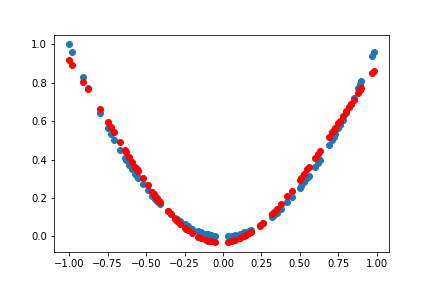

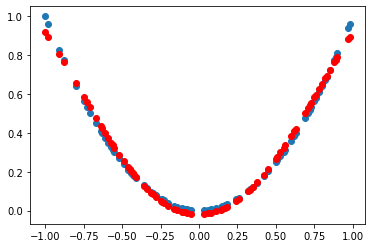

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 5개로 증가하니까 살짝 좋아진 것 같다.
####<br>

#### 4-1-5. 히든 레이어를 10개로

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

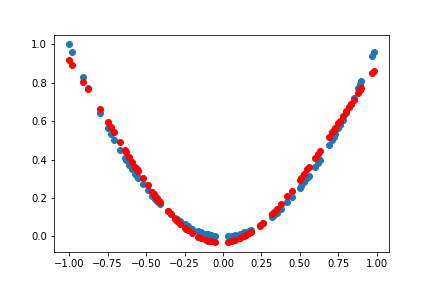

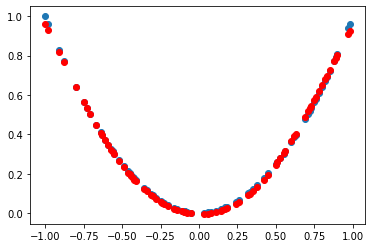

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 10개로 증가했을 때는 더 좋아진 것이 눈에 보인다.
####<br>

### 4-2. node 수 조정하기

#### 4-2-1. node 수를 작게(10개 → 5개)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.33211374282837
80/80 [==============================] - 0s 1ms/sample - loss: 0.0021 - mean_squared_error: 0.0021
loss= 0.0021007001865655183
mse= 0.0021007


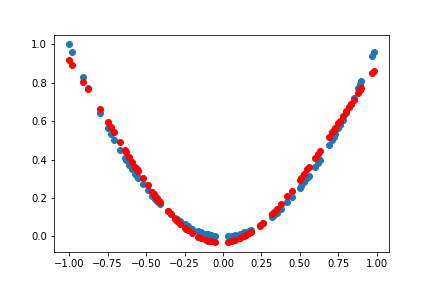

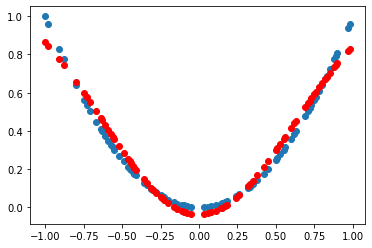

In [ ]:
model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))    # Modify
model.add(Dense(5, activation='tanh'))    # Modify
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 5개 노드의 경우 살짝 차이가 난다.
####<br>

#### 4-2-2. 노드 수를 아주 작게(10개 → 2개)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.959673881530762
80/80 [==============================] - 0s 1ms/sample - loss: 0.0023 - mean_squared_error: 0.0023
loss= 0.0023074370343238114
mse= 0.002307437


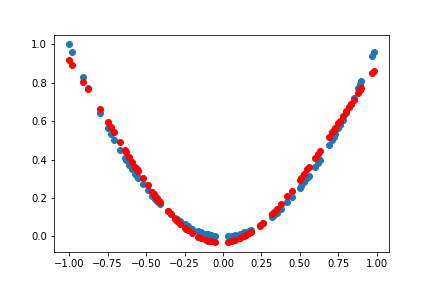

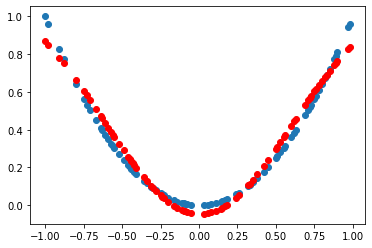

In [ ]:
model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,)))    # Modify
model.add(Dense(2, activation='tanh'))    # modify
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 2개의 경우 차이가 좀 더 커 보인다.
####<br>

#### 4-2-3. 노드 수가 1개

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.134120225906372
80/80 [==============================] - 0s 1ms/sample - loss: 0.0813 - mean_squared_error: 0.0813
loss= 0.0812870055437088
mse= 0.081287004


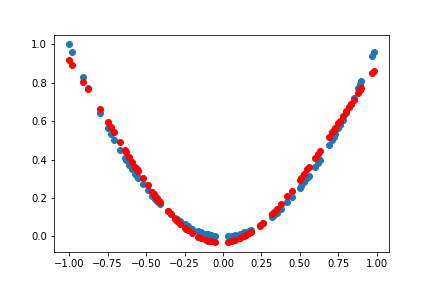

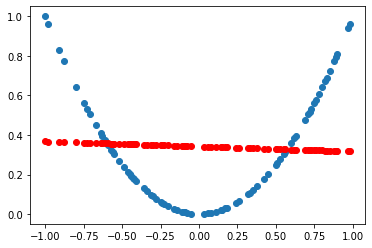

In [ ]:
model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))      # Modify
model.add(Dense(1, activation='tanh'))      # Modify
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 1개의 경우 학습이 되지 않는다.
####<br>

####<br>
#######################################################################################################

## 5. 학습 내용 조정

### 5-1. 학습 데이터만 변경하기
- 모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

In [5]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

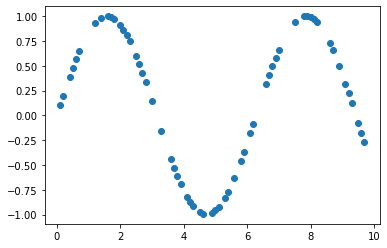

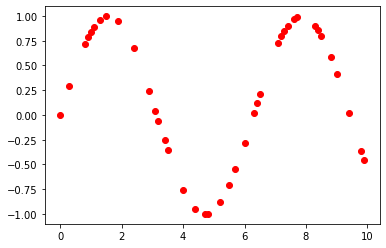

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.405460834503174
40/40 [==============================] - 0s 3ms/sample - loss: 0.2096 - mean_squared_error: 0.2096
loss= 0.20961216688156128
mse= 0.20961218


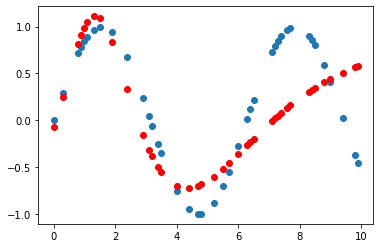

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 학습이 충분히 되지 않았다.
####<br>

### 5-2. 추가 학습 수행하기

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 4.672479867935181


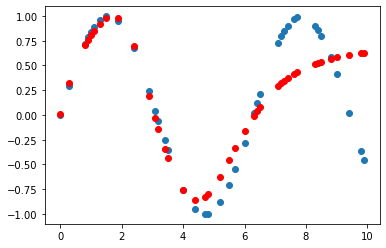

1 times fitting
elapsed : 4.658149480819702


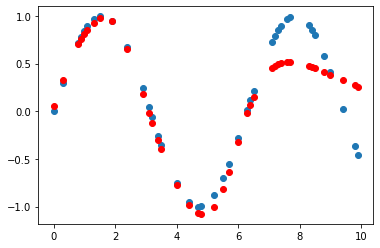

2 times fitting
elapsed : 4.699729919433594


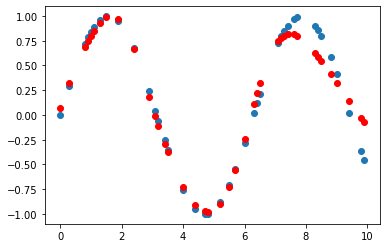

3 times fitting
elapsed : 4.752533912658691


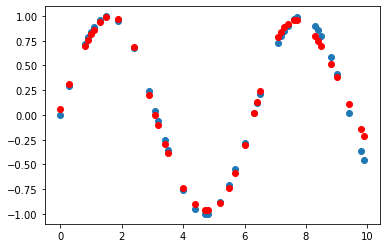

4 times fitting
elapsed : 4.8384692668914795


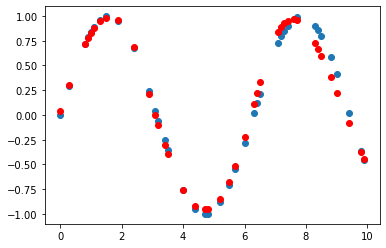

5 times fitting
elapsed : 4.906623363494873


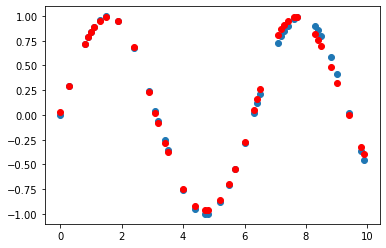

6 times fitting
elapsed : 4.815579175949097


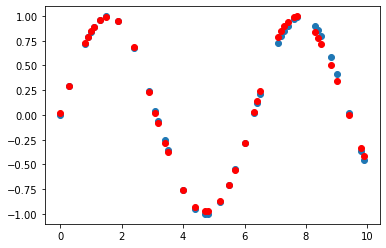

7 times fitting
elapsed : 4.8583502769470215


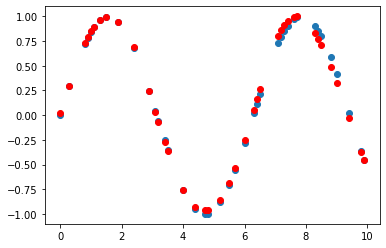

8 times fitting
elapsed : 4.8297624588012695


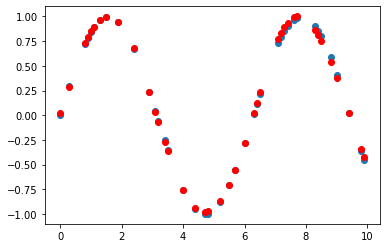

9 times fitting
elapsed : 4.866361856460571


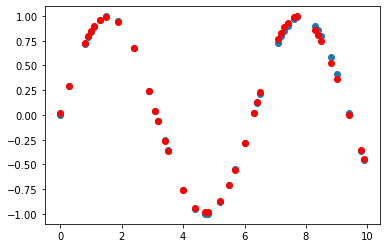

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

- 학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.
####<br>

### 5-3. model.fit()의 batch_size
- batch_size는 학습 가능한 모델 변수(가중치 및 바이어스)를 업데이트하기 전에 모델을 학습하는데 사용되는 샘플의 수이다.
- 모든 단일 학습 단계에서는 모델을 통해 샘플 일괄처리가 전파된 다음 역전파 되면서 모든 샘플에 대한 경사를 계산한다.
####<br>
- GPU를 지원하는 시스템에서는 batch_size는 GPU와 관련된 옵션으로 동작한다.
- 한번에 GPU에 보내는 데이터의 수이다.
- batch_size는 GPU의 메모리에 의해 크기가 제한된다.
####<br>
- batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.
- batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.
####<br>
- GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 
- 복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.
####<br>
- 하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


#### 5-3-1. batch_size 지정

In [ ]:
def build_model():

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

#### 5-3-2. batch_size 적용
- batch_size : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 64.71285438537598


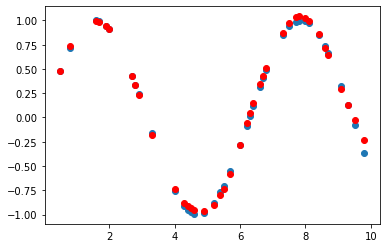

batch_size=2
elapsed : 37.35245656967163


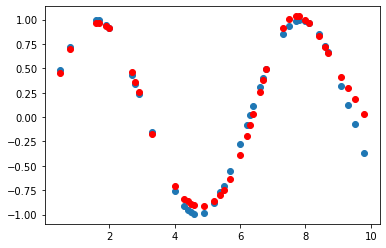

batch_size=5
elapsed : 16.42401671409607


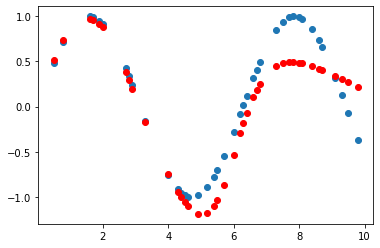

batch_size=10
elapsed : 9.533186674118042


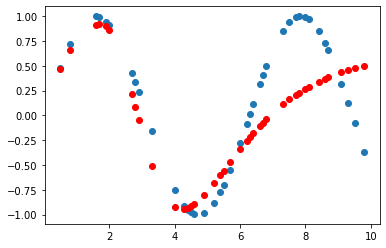

batch_size=20
elapsed : 5.951233863830566


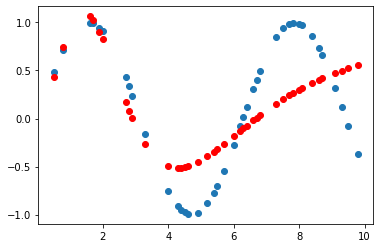

batch_size=50
elapsed : 4.66952109336853


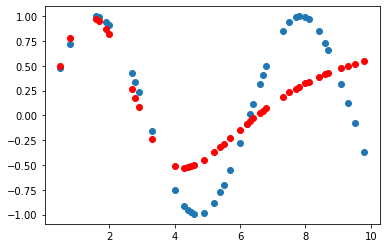

batch_size=100
elapsed : 3.379600763320923


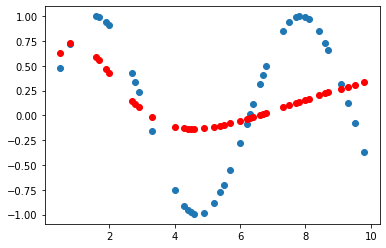

batch_size=200
elapsed : 3.5131404399871826


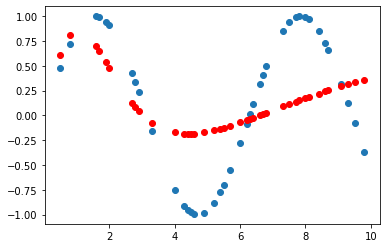

batch_size=500
elapsed : 3.6291580200195312


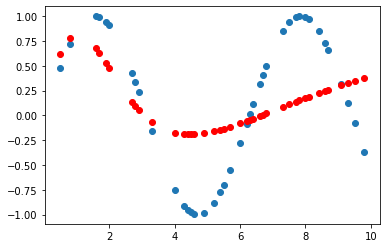

In [ ]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

- 맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다.
- batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.
####<br>

### 5-4. 학습이 진행된 내역 보기


#### 5-4-1. model.fit()의 반환값 history
- 반환된 history의 loss로 진행 상황을 확인.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_94 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.4591920375823975


In [ ]:
print(history.history)

{'loss': [1.1158663233121235, 0.5608537495136261, 0.4729577898979187, 0.4505564173062642, 0.44403932491938275, 0.4474156399567922, 0.4479558567206065, 0.43979265292485553, 0.4388852119445801, 0.43567879994710285, 0.4306432505448659, 0.4301381806532542, 0.42752279837926227, 0.4275650878747304, 0.42438213030497235, 0.4223940869172414, 0.42450666427612305, 0.4179849723974864, 0.42745035886764526, 0.4161112904548645, 0.4132592777411143, 0.4126174549261729, 0.416944553454717, 0.40874384840329486, 0.4092112183570862, 0.4120596945285797, 0.41028549273808795, 0.4053509434064229, 0.4017101625601451, 0.40756771961847943, 0.40330369273821515, 0.39938604831695557, 0.4182616372903188, 0.4014567732810974, 0.4035964508851369, 0.39773548642794293, 0.39795540769894916, 0.39992911616961163, 0.3913959165414174, 0.39519017934799194, 0.3915097216765086, 0.3885343670845032, 0.3891759514808655, 0.3871525824069977, 0.3888663152853648, 0.4068211515744527, 0.3840847710768382, 0.38226646184921265, 0.387566427389

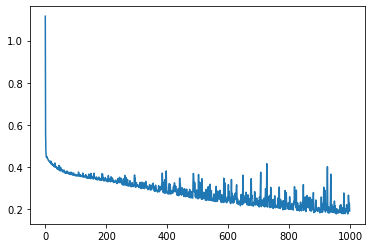

In [ ]:
plt.plot(history.history['loss'])

#### 5-4-2. model.fit() verbose
- 0 : X
- 1 : progress bar
- 2 : 1 line per epoch

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

print(train_x.shape)

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_97 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2547 - mean_squared_error: 0.2547
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1576 - mean_squared_error: 0.1576
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1185 - mean_squared_error: 0.1185
Epoch

### 5-5. 학습 중 검증(Validation)

#### 5-5-1. model.fit()의 validation_data

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_100 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 40 samples
Epoch 1/1000
60/60 [==============================] - 1s 9ms/sample - loss: 0.5319 - mean_squared_error: 0.5319 - val_loss: 0.3484 - val_mean_squared_error: 0.3484
Epoch 2/1000
60/60 [==============================] - 0s 292us/sample - loss: 0.5297 - mean_squared_error: 0.5297 - val_loss: 0.3463 - val_mean_squared_error: 0.3463
Epoch 3/100

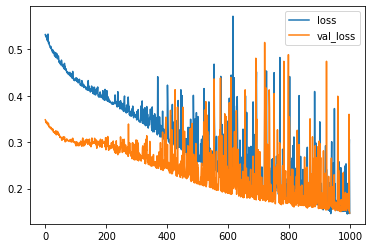

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

####<br>

#### 5-5-2. model.fit()의 validation_split
- 따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용
- validation에 사용된 데이터는 학습에 사용되지 않는다

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_103 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.748665571212769


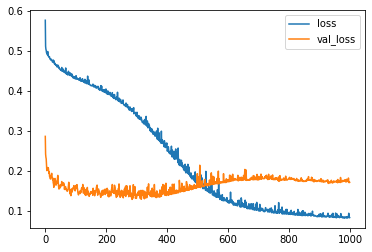

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

####<br>

### 5-6. 데이터 크기와 epoch 수

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_106 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 - 4s - loss: 0.2561 - mean_squared_error: 0.2561
Epoch 2/5
60000/60000 - 4s - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 3/5
60000/60000 - 4s - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 4/5
60000/60000 - 4s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 5/5
60000/60000 - 4s - loss: 0.0126 - mean_squared_error: 0.0126
elapsed

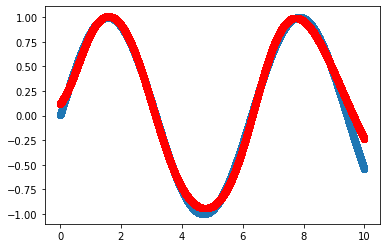

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.
- epoch가 적어도 데이터 수가 많으면 학습 잘된다.
####<br>

### 5-7. model.fit()의 shuffle: 학습 시의 데이터 섞기
- 학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_109 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.327381134033203


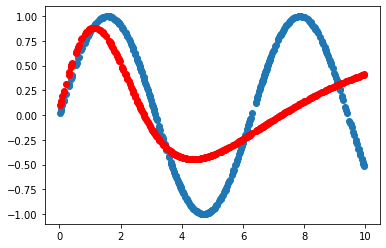

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_112 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.2975645065307617


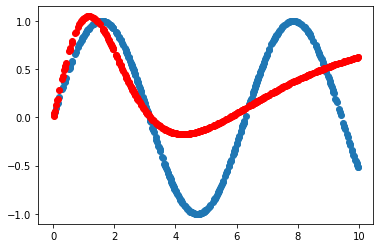

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- 학습된 결과가 살짝 향상된 것을 볼 수 있다.
- 편향을 방지하기 위해서라도 항상 shuffle하는 것이 좋다.

####<br>
#######################################################################################################

## 6. 데이터 준비

### 6-1. Shuffle


60


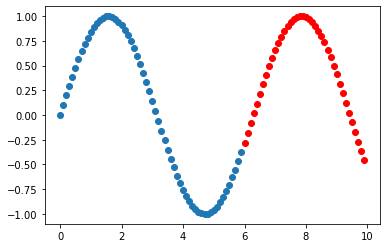

In [ ]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_115 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.8014538288116455


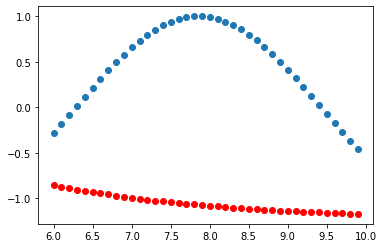

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

- train 데이터와 test 데이터가 서로 떨어져 있다.
- train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.
- 전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.
####<br>

60


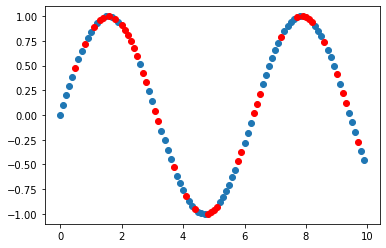

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

####<br>

### 6-2. Normalization / Standardization
- 입력이 여러 차원일 때 각 차원의 입력을 동일한 스케일로 맞추어주면, 학습이 빠르게 진행된다고 한다.
  - Normalization : 전체 데이터를 0~1로 변환해준다.
  - Standardization : 평균을 0, 표준편차를 1이되도록 변환해 준다.

min= -10.0
max= 9.899999999999928


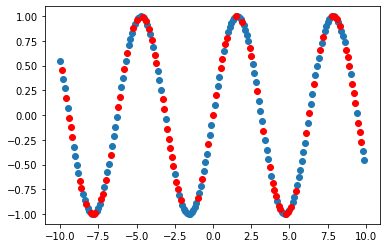

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=-10, end=10, step=0.1)

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

min= 0.0
max= 0.9949999999999963


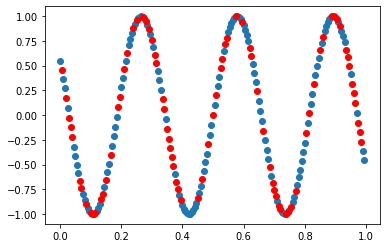

In [ ]:
min = -10 # ADDED
max = 10 # ADDED

train_x = (train_x-min)/(max-min) # ADDED
test_x = (test_x-min)/(max-min) # ADDED

print("min=",np.min(train_x))
print("max=",np.max(train_x))

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_118 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.95235538482666
80/80 [==============================] - 0s 3ms/sample - loss: 0.4184 - mean_squared_error: 0.4184
loss= 0.4184319913387299
mse= 0.418432


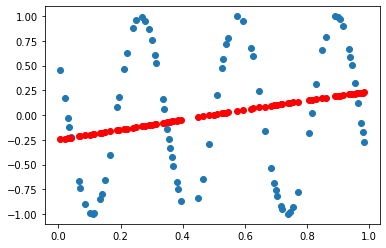

In [ ]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 7. 모델 저장과 로딩

### 7-1. 학습된 모델의 저장과 로딩

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.715088844299316
2/2 [==============================] - 0s 4ms/step - loss: 0.1514 - mse: 0.1514
loss= 0.15136270225048065
mse= 0.15136270225048065


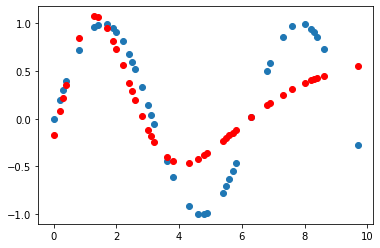

In [6]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

#### 7-1-1. 모델 저장

In [7]:
model.save('my_model.h5')

!ls -al

total 36
drwxr-xr-x 1 root root  4096 Aug  5 05:20 .
drwxr-xr-x 1 root root  4096 Aug  5 05:14 ..
drwxr-xr-x 4 root root  4096 Jul 16 13:19 .config
-rw-r--r-- 1 root root 19808 Aug  5 05:20 my_model.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


#### 7-1-2. 모델 로딩

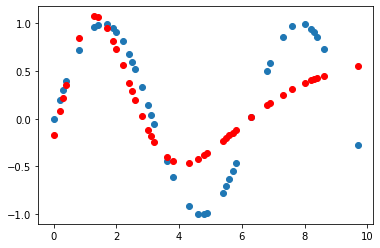

In [8]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

### 7-2. TensorFlow 포멧의 저장과 로딩
- 기존에 사용하던 keras.experimental.export_saved_model(model, 'model_path') 는 deprecated 되었음
- 새로운 방법
  - tf.keras.models.save_model(model, path, save_format="tf")
  - model.save(path, save_format="tf")
####<br>
- new_model = keras.experimental.load_from_saved_model('model_path') 는 deprecated 되었음
- 새로운 방법
  - new_model = keras.models.load_model(path)

INFO:tensorflow:Assets written to: model_path/assets
total 40
drwxr-xr-x 1 root root  4096 Aug  5 05:28 .
drwxr-xr-x 1 root root  4096 Aug  5 05:14 ..
drwxr-xr-x 4 root root  4096 Jul 16 13:19 .config
drwxr-xr-x 4 root root  4096 Aug  5 05:36 model_path
-rw-r--r-- 1 root root 19808 Aug  5 05:20 my_model.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data
total 100
drwxr-xr-x 4 root root  4096 Aug  5 05:36 .
drwxr-xr-x 1 root root  4096 Aug  5 05:28 ..
drwxr-xr-x 2 root root  4096 Aug  5 05:28 assets
-rw-r--r-- 1 root root  7982 Aug  5 05:36 keras_metadata.pb
-rw-r--r-- 1 root root 76664 Aug  5 05:36 saved_model.pb
drwxr-xr-x 2 root root  4096 Aug  5 05:36 variables


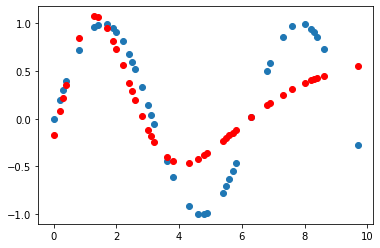

In [12]:
# keras.experimental.export_saved_model(model, 'model_path')   ---> deprecated
keras.models.save_model(model, 'model_path', save_format='tf')
# model.save('model_path', save_format="tf")

!ls -al
!ls -al model_path

# new_model = keras.experimental.load_from_saved_model('model_path')   ---> deprecated
new_model = keras.models.load_model('model_path')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 8. GPU 사용하기
- Colab의 경우, 따로 명시하지 않으면 default로 GPU를 사용한다.
- 명시적으로 설정할 수도 있다.

### 8-1. 디바이스 목록 보기

In [13]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


### 8-2. 디바이스 설정하기
- 다음과 같은 디바이스를 설정할 수 있다.
  - /device:GPU:0
  - /GPU:0
  - /gpu:0
  - /gpu
  - /cpu:0
  - /cpu

In [14]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.818460702896118


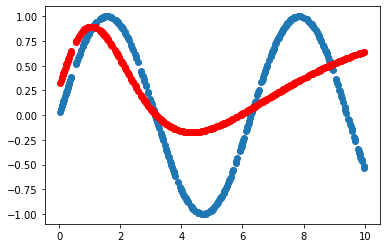

In [15]:
with tf.device('/device:GPU:0'): # ADDED

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.9218449592590332


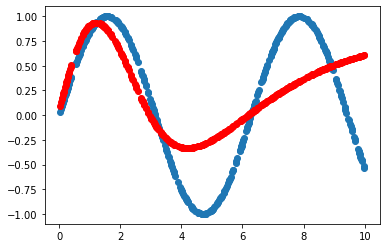

In [16]:
# with tf.device('/device:GPU:0'):
with tf.device('/GPU:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.7857394218444824


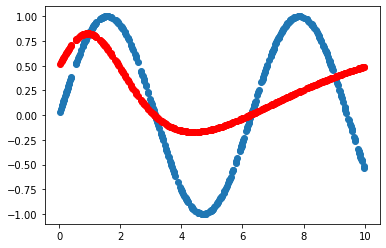

In [17]:
# with tf.device('/device:GPU:0'):
with tf.device('/gpu:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.7775979042053223


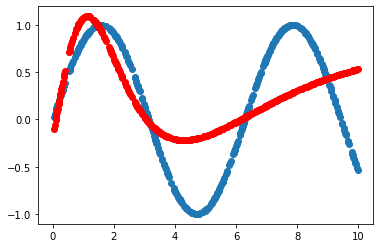

In [18]:
# with tf.device('/GPU:0'):
with tf.device('/gpu:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.776250123977661


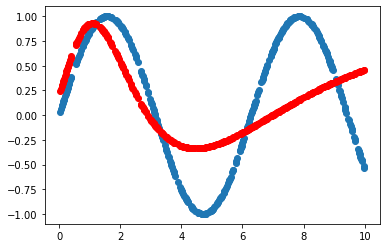

In [19]:
# with tf.device('/GPU:0'):
with tf.device('/gpu'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.4677190780639648


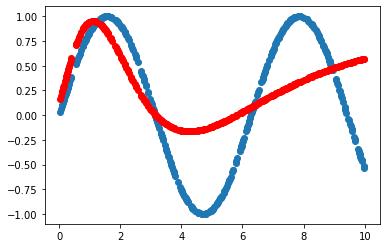

In [20]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.3788938522338867


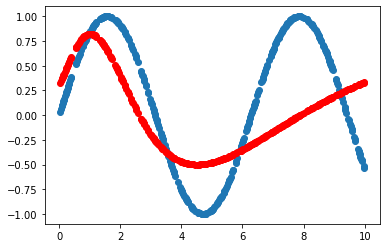

In [21]:
# with tf.device('/GPU:0'):
with tf.device('/CPU'):

  model = Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

####<br>
#######################################################################################################

## 9. 과적합(Overfitting) 처리
- DropOut
- BatchNormalization
- Regularization

### 9-1. DropOut 레이어

In [22]:
from tensorflow.keras.layers import Dropout

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                20        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.091668605804443
2/2 [==============================] - 0s 4ms/step - loss: 0.1406 - mse: 0.1406
loss= 0.1405818611383438
mse= 0.1405818611383438


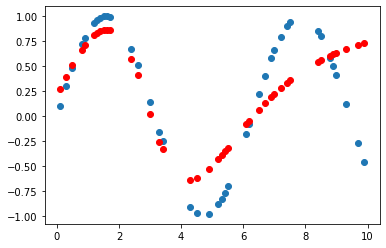

In [23]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dropout(0.1)) # ADDED
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

### 9-2. BatchNormalization 레이어

In [24]:
from tensorflow.keras.layers import BatchNormalization

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                20        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________
elapsed : 6.022949934005737
2/2 [==============================] - 0s 6ms/step - loss: 0.1724 - mse: 0.1724
loss= 0.17239196598529816
mse= 0.17239196598529816


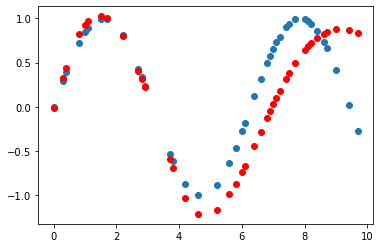

In [25]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>

### 9-3. Regularization
- Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.
  - l1()
  - l1_l2()
  - l2()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.2482240200042725
2/2 [==============================] - 0s 5ms/step - loss: 0.2232 - mse: 0.2083
loss= 0.22315850853919983
mse= 0.2082667350769043


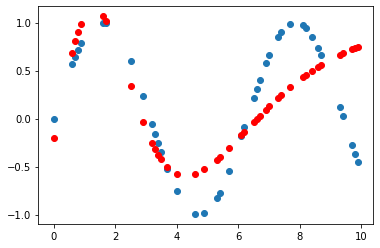

In [26]:
from tensorflow.keras.regularizers import l1, l2

(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

### 9-4. 데이터 크기와 과적합
- 과적합을 해결하는 가장 좋은 방법은 데이터를 늘리는 것이다.
- 데이터의 확보가 쉬운 작업이 아니기때문에 다양한 방법이 제안되었다.

####<br>
#######################################################################################################

## 10. 가중치 초기화
- Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.
  - 'he_normal'
  - 'lecun_normal'

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.335497617721558
2/2 [==============================] - 0s 7ms/step - loss: 0.1772 - mse: 0.1772
loss= 0.17724105715751648
mse= 0.17724105715751648


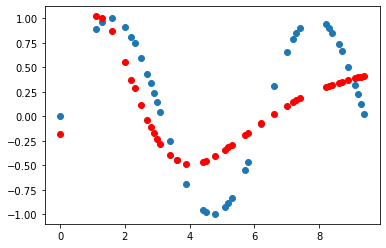

In [27]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 11. 노이즈

In [28]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mse = model.evaluate(test_x, test_y)
  print("loss=",loss)
  print("mse=",mse)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

####<br>

### 11-1. 노이즈가 없을 때

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 82.16139841079712
125/125 [==============================] - 0s 1ms/step - loss: 2.0979e-04 - mse: 2.0979e-04
loss= 0.00020979119290132076
mse= 0.00020979119290132076


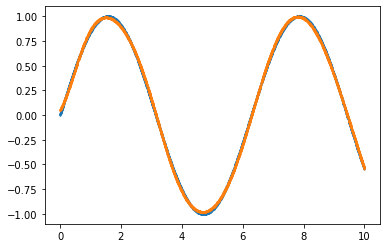

In [29]:
train_sin_with_noise(0.0)

####<br>

### 11-2. 노이즈 크기 0.1

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 64.88514256477356
125/125 [==============================] - 0s 1ms/step - loss: 9.4878e-04 - mse: 9.4878e-04
loss= 0.000948784698266536
mse= 0.000948784698266536


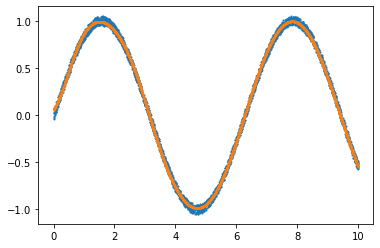

In [30]:
train_sin_with_noise(0.1)

####<br>

### 11-3. 노이즈 크기 0.5

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 58.19062066078186
125/125 [==============================] - 0s 1ms/step - loss: 0.0211 - mse: 0.0211
loss= 0.021053800359368324
mse= 0.021053800359368324


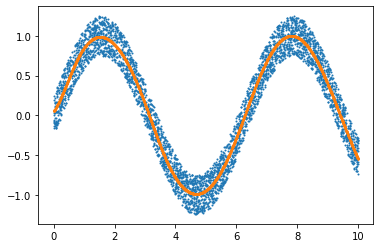

In [ ]:
train_sin_with_noise(0.5)

####<br>

### 11-4. 노이즈 크기 1.0

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 56.441752910614014
125/125 [==============================] - 0s 1ms/step - loss: 0.0856 - mse: 0.0856
loss= 0.08558066189289093
mse= 0.08558066189289093


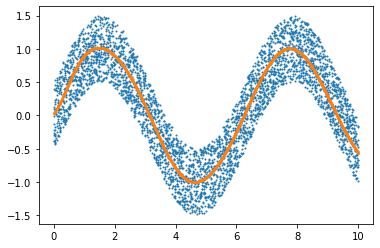

In [ ]:
train_sin_with_noise(1.0)

####<br>

### 11-5. 노이즈 크기 10.0

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 58.041136026382446
125/125 [==============================] - 0s 1ms/step - loss: 8.3251 - mse: 8.3251
loss= 8.325140953063965
mse= 8.325140953063965


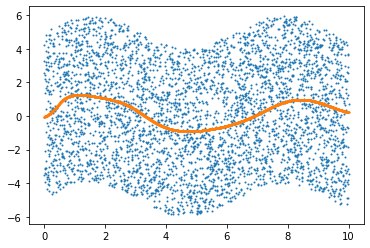

In [ ]:
train_sin_with_noise(10.0)

####<br>

### 11-6. 노이즈 피쳐
- 노이즈 입력을 하나 더 준다.

In [ ]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3908 - mse: 0.3908
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3182 - mse: 0.3182
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2874 - mse: 0.2874
Epoch 4/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2576 - mse: 0.2576
Ep

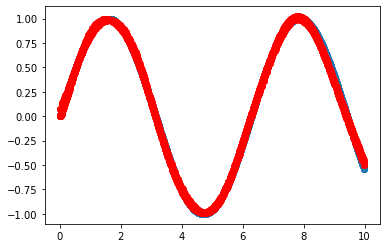

In [ ]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

####<br>
#######################################################################################################

## 12. 학습 되지 않는 랜덤 함수
- 랜덤 한수의 경우 x와 y의 간에 관계가 없다.
- 입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


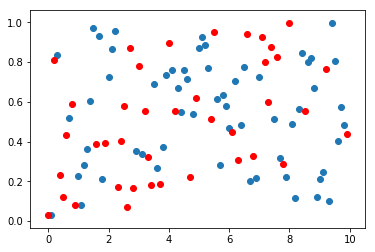

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

####<br>
#######################################################################################################

## 13. CallBack
- 학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
def train_with_callbacks(callbacks):


  # 모델 정의
  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  # 모델 컴파일
  model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
  model.summary()


  # 학습
  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1, callbacks=callbacks)
  print("elapsed : {}".format(time.time() - start_time))


####<br>

### 13-1. 모델 저장

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

train_with_callbacks([model_check_point])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 25.501685857772827


####<br>

### 13-2. 로스 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



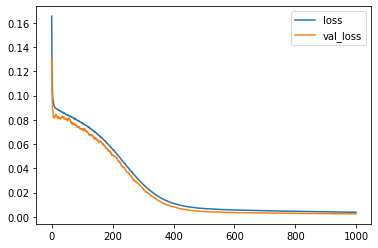

loss =  0.0037006411046065666 , val_loss =  0.0024069268256425858
elapsed : 160.5745050907135


In [ ]:
plot_losses = PlotLosses()

train_with_callbacks([plot_losses])

####<br>

### 13-3. early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)         # 중지까지의 여유분

train_with_callbacks([early_stopping])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 15.360506772994995


####<br>

### 13-4. 학습율 조정
- 학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              factor=0.2,         # 줄이는 양
                              patience=5,         # 대상 기간동안 유지
                              min_lr=0.001)       # 최소 학습율

train_with_callbacks([reduce_lr])

####<br>

### 13-5. 모두 한번에

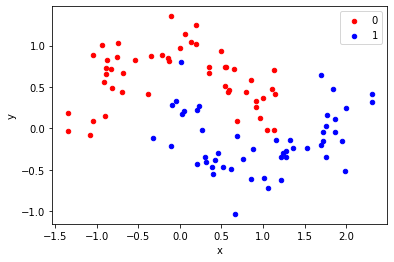

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


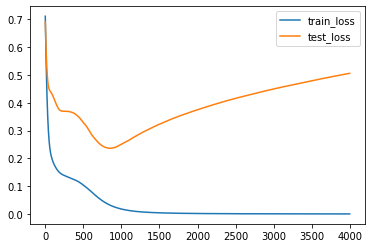

In [ ]:
# copy from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


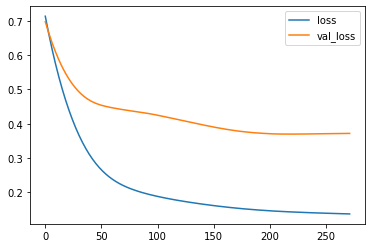

loss =  0.13716855645179749 , val_loss =  0.37187782526016233
Epoch 00272: early stopping


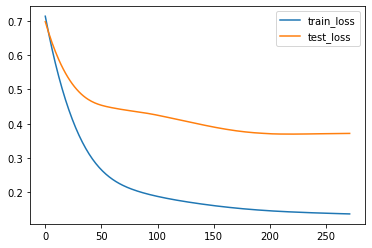

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=4000, verbose=0, callbacks=callbacks)


pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()


## 14. 다양한 입출력

### 14-1. 2개의 입력, 1개의 출력
- $x_1 + x_2 \rightarrow y$의 함수를 학습
- $x_1$과 $x_2$는 0~10의 범위를 갖는다.

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_116 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 35.705761194229126
40/40 [==============================] - 0s 2ms/sample - loss: 0.0065 - mean_squared_error: 0.0065
loss= 0.006477165594696998
mse= 0.006477165


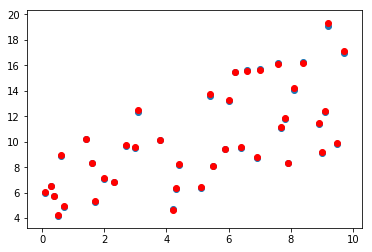

In [ ]:

x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)

y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]



from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [ ]:
print(x.shape)
print(x[:5])
print(y[:5])

(100, 2)
[[1.5 8.4]
 [8.6 5.6]
 [4.7 9.6]
 [4.9 2.7]
 [7.5 7.1]]
[ 9.9 14.2 14.3  7.6 14.6]


####<br>

### 14-2. 1개의 입력, 2개의 출력
- 다음과 같이 y는 2개의 값을 갖고, $y_1 = x%2$, $y_2=x%3$인 함수를 학습

```
x = np.arange(0,10,0.1)
y1 = x%2
y2 = x%3
```


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_168 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 79.75155305862427
40/40 [==============================] - 0s 7ms/sample - loss: 0.4017 - mean_squared_error: 0.4017
loss= 0.4017043113708496
mse= 0.4017043


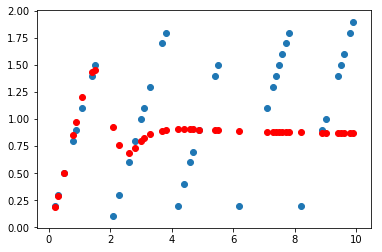

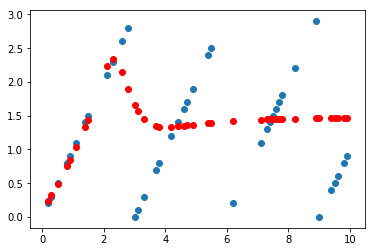

In [ ]:
x = np.arange(0, 10, 0.1)
np.random.shuffle(x)
y1 = x%2
y2 = x%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x,test_y[:,0])
plt.scatter(test_x,y_[:,0], color="r")
plt.show()

plt.scatter(test_x,test_y[:,1])
plt.scatter(test_x,y_[:,1], color="r")
plt.show()


####<br>

### 14-4. 2개의 입력, 2개의 출력
- $x_1 + x_2 \rightarrow z$, 
- $y_1 = z%2$, $y_2=z%3$인 함수를 학습
- $x_1$과 $x_2$는 0~10의 범위를 갖는다.

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_177 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_178 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 80.7371563911438
40/40 [==============================] - 0s 7ms/sample - loss: 1.0752 - mean_squared_error: 1.0752
loss= 1.075191903114319
mse= 1.0751919


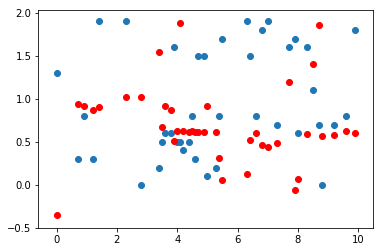

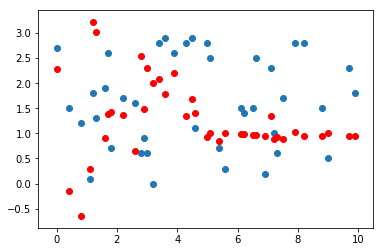

In [ ]:
x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x = np.ones((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2

z = x1 + x2
y1 = z%2
y2 = z%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y[:,0])
plt.scatter(test_x.T[0],y_[:,0], color="r")
plt.show()

plt.scatter(test_x.T[1],test_y[:,1])
plt.scatter(test_x.T[1],y_[:,1], color="r")
plt.show()
